In [1]:
from csd import CSD
from csd.typings.typing import MeasuringTypes, CSDConfiguration, Backends
import numpy as np

In [2]:
alphas = list(np.arange(0.05, 1.55, 0.05))

In [5]:
csd = CSD(csd_config=CSDConfiguration({
    'steps': 500,
    'cutoff_dim': 10,
    'batch_size': 1000,
    'architecture': {
        'displacement': True,
        'squeezing': False,
    },
    'save_results': True,
    'save_plots': True
}))

[CSD] 0.0.1|DEBUG|2021-10-17 08:19:29]: Executing One Layer circuit with Backend: fock,  with measuring_type: probabilities and cutoff_dim: 10
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:29]: Optimizing for alpha: 0.05
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:43]: Optimized for alpha: 0.05 beta: -0.9100964813619766 p_succ: 0.5419580790814739
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:43]: _execute_for_one_alpha, took: 13 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:43]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:51]: Optimized for alpha: 0.1 beta: -0.7296239515079846 p_succ: 0.5844384837376153
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:51]: _execute_for_one_alpha, took: 7 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:51]: Optimizing for alpha: 0.15
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:59]: Optimized for alpha: 0.15 beta: -0.6962402973767471 p_succ: 0.6278419318736579
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:59]: _execute_for_one_alpha, took: 8 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:19:59]: Optimizing for al

[CSD] 0.0.1|DEBUG|2021-10-17 08:23:10]: execute, took: 3 minutes and 41 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:10]: Executing One Layer circuit with Backend: gaussian,  with measuring_type: probabilities and cutoff_dim: 10
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:10]: Optimizing for alpha: 0.05
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:25]: Optimized for alpha: 0.05 beta: -0.885414564314112 p_succ: 0.5417476185926424
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:25]: _execute_for_one_alpha, took: 14 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:25]: Optimizing for alpha: 0.1
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:36]: Optimized for alpha: 0.1 beta: -0.5645791055783974 p_succ: 0.5962637858523272
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:36]: _execute_for_one_alpha, took: 10 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:36]: Optimizing for alpha: 0.15
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:50]: Optimized for alpha: 0.15 beta: -0.715745820332696 p_succ: 0.626553356601059
[CSD] 0.0.1|DEBUG|2021-10-17 08:23:50]: _execute_for_on

[CSD] 0.0.1|INFO|2021-10-17 08:29:20]: Save results to file
[CSD] 0.0.1|INFO|2021-10-17 08:29:20]: Save plot to file
[CSD] 0.0.1|DEBUG|2021-10-17 08:29:20]: execute, took: 6 minutes and 9 seconds.
[CSD] 0.0.1|DEBUG|2021-10-17 08:29:20]: execute_all_backends_and_measuring_types, took: 9 minutes and 51 seconds.


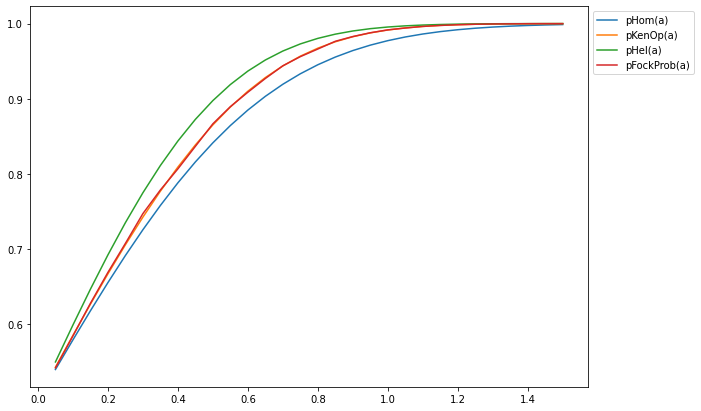

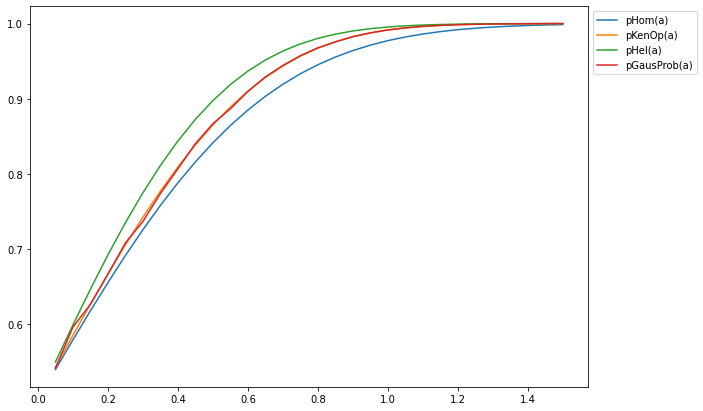

In [6]:
results = csd.execute_all_backends_and_measuring_types(
    alphas=alphas,
    backends=[Backends.FOCK,
              Backends.GAUSSIAN],
    measuring_types=[MeasuringTypes.PROBABILITIES]
)

In [7]:
from csd.util import save_object_to_disk, load_object_from_file

In [8]:
save_object_to_disk(obj=csd, path='results')

In [9]:
loaded_csd = load_object_from_file(name='CSD_20211017_083741', path='results')

TypeError: __new__() missing 1 required positional argument: 'backend'

In [10]:
csd.__getnewargs__()

AttributeError: 'CSD' object has no attribute '__getnewargs__'

In [12]:
csd.__new__()

TypeError: object.__new__(): not enough arguments

In [2]:
from typing import List
from csd.batch import Batch
# from csd.codeword import CodeWord
from csd.codebooks import CodeBooks
# import random
from csd.codeword import CodeWord

import numpy as np

In [3]:
def test_linear_codes(word_size: int = 3, alpha_value: float = 0.6) -> CodeBooks:
    batch = Batch(size=0, word_size=word_size, alpha_value=alpha_value, random_words=False)
    cb = CodeBooks(batch=batch)
    return cb

In [15]:
def filter_number_modes_from_codebook(codebook: List[CodeWord]) -> int:
    number_codebooks = len(codebook)
    if number_codebooks <= 0:
        print(f'WARNING: codebook len: {number_codebooks}')
        return 0
    orig_number_modes = codebook[0].size
    if number_codebooks == 1:
        print(f'INFO: codebook len: {number_codebooks} & number modes: {orig_number_modes}')
        return orig_number_modes
    binary_codebook = [codeword.binary_code for codeword in codebook]
    # print(f'binary_codebook: {binary_codebook}')
    summed_codes = list(map(sum, zip(*binary_codebook)))
    # print(f'summed_codes: {summed_codes}')
    zero_constant_modes = summed_codes.count(0)
    # print(f'zero_constant_modes: {zero_constant_modes}')
    one_constant_modes = summed_codes.count(number_codebooks)
    if one_constant_modes > 0:
        print(f'one_constant_modes: {one_constant_modes}')
        print(f'summed_codes: {summed_codes}')
    return orig_number_modes - zero_constant_modes - one_constant_modes

In [29]:
def test_filter_modes():
    alphas = _get_alphas()
    for size in range(2, 8):
        for alpha in alphas:
            cb = test_linear_codes(word_size=size, alpha_value=alpha)
            final_number_modes = [filter_number_modes_from_codebook(codebook=codebook) for codebook in cb.codebooks]
            for codebook, final_number_mode in zip(cb.codebooks, final_number_modes):
                # print(f'codebook: {codebook}\nmodes: {codebook[0].size} and '
                #       f'final_number_mode: {final_number_mode}')
                different_modes = '*' * (codebook[0].size - final_number_mode)
                print(f'ALPHA: {np.round(alpha, 2)} modes: {codebook[0].size} and '
                      f'final_number_mode: {final_number_mode} {different_modes}')
                

In [2]:
def _get_alphas() -> List[float]:
    alpha_init = 0.1
    alpha_end = 1.4
    number_points_to_plot = 16
    alpha_step = (alpha_end - alpha_init) / number_points_to_plot
    return list(np.arange(alpha_init, alpha_end, alpha_step))

In [40]:
alphas = _get_alphas()

In [41]:
alphas

[0.1,
 0.18125,
 0.26249999999999996,
 0.34375,
 0.42499999999999993,
 0.50625,
 0.5874999999999999,
 0.6687499999999998,
 0.7499999999999999,
 0.8312499999999999,
 0.9124999999999999,
 0.9937499999999998,
 1.075,
 1.15625,
 1.2374999999999998,
 1.3187499999999999]

In [43]:
alphas[4:]

[0.42499999999999993,
 0.50625,
 0.5874999999999999,
 0.6687499999999998,
 0.7499999999999999,
 0.8312499999999999,
 0.9124999999999999,
 0.9937499999999998,
 1.075,
 1.15625,
 1.2374999999999998,
 1.3187499999999999]

In [1]:
from csd.best_codebook import BestCodeBook
from csd.top5_best_codebooks import Top5_BestCodeBooks
import random
from typing import Union

In [4]:
cbs = test_linear_codes()

In [7]:
cb = random.choice(cbs.codebooks)
measurements = random.choice(cbs.codebooks)

In [6]:
cb[0].alpha

0.6

In [11]:
cb

[[0.6, 0.6, 0.6], [0.6, -0.6, -0.6], [-0.6, 0.6, -0.6], [-0.6, -0.6, 0.6]]

In [12]:
measurement = [[random.choice([0,1]) for _ in range(codeword.size)] for codeword in cb ]

In [13]:
measurement

[[1, 1, 0], [0, 0, 0], [1, 0, 1], [1, 0, 0]]

In [8]:
best = BestCodeBook(codebook=cb, measurements=measurements, success_probability=0.8, helstrom_probability=0.87, homodyne_probability=0.85)

In [9]:
print(best)

{"alpha": 0.6, "modes": 3, "success_probability": 0.8, "helstrom_probability": 0.87, "homodyne_probability": 0.85, "codebook": [[0, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1]], "measurements": [[0, 0, 0], [0, 1, 1], [1, 0, 0], [1, 1, 1]]}


In [13]:
import csv
import json

In [10]:
import csv 
items = [(('fruits', 'apple'), 25), (('vegetables', 'tomato'), 23), (('chocolate', 'kitkat'), 42)]
with open('fruits.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerows(items)

In [19]:
with open('test.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(list(json.loads(best.__str__()).keys()))

In [18]:
list(json.loads(best.__str__()).keys())

['alpha',
 'modes',
 'success_probability',
 'helstrom_probability',
 'homodyne_probability',
 'codebook',
 'measurements']

In [20]:
list(json.loads(best.__str__()).values())

[0.6,
 3,
 0.8,
 0.87,
 0.85,
 [[0, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1]],
 [[0, 0, 0], [0, 1, 1], [1, 0, 0], [1, 1, 1]]]

In [22]:
with open('test.csv', 'a+', newline='') as f:
    write = csv.writer(f)
    write.writerow(list(json.loads(best.__str__()).values()))

In [27]:
alpha = 0.0
modes = 0
success_probability = 0.0
helstrom_probability = 0.0
homodyne_probability = 0.0
codebook = []
measurements = []

In [37]:
with open('test.csv', 'r') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        print(row)
        alpha = float(row[0])
        modes = int(row[1])
        success_probability = float(row[2])
        helstrom_probability = float(row[3])
        homodyne_probability = float(row[4])
        codebook = json.loads(row[5])
        measurements = row[6]
        

['0.6', '3', '0.8', '0.87', '0.85', '[[0, 0, 0], [0, 1, 0], [1, 0, 1], [1, 1, 1]]', '[[0, 0, 0], [0, 1, 1], [1, 0, 0], [1, 1, 1]]']


In [29]:
alpha

0.6

In [30]:
modes

3

In [31]:
success_probability

0.8

In [32]:
helstrom_probability

0.87

In [33]:
homodyne_probability

0.85

In [41]:
type(codebook[0][0])

int

In [24]:
final

''

In [2]:
top5 = Top5_BestCodeBooks()

In [3]:
top5.top5

[]

In [5]:
list(range(1,6))

[1, 2, 3, 4, 5]

In [8]:
random.uniform(0, 1)

0.3634040786380177

In [4]:
def _generate_codebooks(word_size: int = 3, alpha_value: float = 0.6) -> CodeBooks:
    batch = Batch(size=0, word_size=word_size, alpha_value=alpha_value, random_words=False)
    return CodeBooks(batch=batch)


def _generate_best_codebook(success_probability: float,
                            modes: int = 3,
                            alpha_value: float = 0.6,
                            helstrom_probability: float = 0.87,
                            homodyne_probability: float = 0.85
                            ) -> Union[None, BestCodeBook]:
    cbs = _generate_codebooks(word_size=modes, alpha_value=alpha_value)
    if cbs.size <= 0:
        return None
    cb = random.choice(cbs.codebooks)
    random_measurement = random.choice(cbs.codebooks)
    return BestCodeBook(codebook=cb,
                        measurements=random_measurement,
                        success_probability=success_probability,
                        helstrom_probability=helstrom_probability,
                        homodyne_probability=homodyne_probability)

In [5]:
alpha=0.75
mode=3
number_codebooks = 10
top5_cbs = Top5_BestCodeBooks()
generated_codebooks = 0
for _ in range(number_codebooks):
    cb = _generate_best_codebook(success_probability=random.uniform(0, 1),
                                 modes=mode,
                                 alpha_value=alpha)
    if cb is None:
        continue
    top5_cbs.add(potential_best_codebook=cb)
    generated_codebooks += 1

In [6]:
top5_cbs.first.codebook

[[0.75, 0.75, 0.75],
 [0.75, -0.75, -0.75],
 [-0.75, 0.75, 0.75],
 [-0.75, -0.75, -0.75]]

In [7]:
top5_cbs.top5

[BestCodeBook(codebook=[[0.75, 0.75, 0.75], [0.75, -0.75, -0.75], [-0.75, 0.75, 0.75], [-0.75, -0.75, -0.75]], measurements=[[0.75, 0.75, 0.75], [0.75, -0.75, -0.75], [-0.75, 0.75, -0.75], [-0.75, -0.75, 0.75]], success_probability=0.9580290152332657, helstrom_probability=0.87, homodyne_probability=0.85),
 BestCodeBook(codebook=[[0.75, 0.75, 0.75], [0.75, -0.75, 0.75], [-0.75, 0.75, 0.75], [-0.75, -0.75, 0.75]], measurements=[[0.75, 0.75, 0.75], [0.75, -0.75, 0.75], [-0.75, 0.75, 0.75], [-0.75, -0.75, 0.75]], success_probability=0.8235431220251648, helstrom_probability=0.87, homodyne_probability=0.85),
 BestCodeBook(codebook=[[0.75, 0.75, 0.75], [0.75, -0.75, -0.75], [-0.75, 0.75, -0.75], [-0.75, -0.75, 0.75]], measurements=[[0.75, 0.75, 0.75], [0.75, -0.75, -0.75], [-0.75, 0.75, -0.75], [-0.75, -0.75, 0.75]], success_probability=0.7958124314824909, helstrom_probability=0.87, homodyne_probability=0.85),
 BestCodeBook(codebook=[[0.75, 0.75, 0.75], [0.75, -0.75, 0.75], [-0.75, 0.75, -0.7